In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import seaborn as sns

In [ ]:
'''
longitude: A measure of how far west 
latitude: A measure of how far north 
housingMedianAge: Median age of a house 
totalRooms: Total number of rooms
totalBedrooms: Total number of bedrooms
population: Total number of people 
households: Total number of households
medianIncome: Median income for households
medianHouseValue: Median house value 
oceanProximity: Location of the house with respect to ocean
'''


In [ ]:
df = pd.read_excel('housing.xlsx')
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
'''
 The attribute total_bedrooms has only 20433 instances meaning there are few values that are missing

  ocean_proximity: Categorical Data
'''

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Percentile indicates the value below which a percentage of the datapoints fall. 
# Example, 25% of the districts have houses that are 18 years old or lesser

In [ ]:
# 1. What is the average median income of the data set and check the distribution of data using appropriate plots. 
# Please explain the distribution of the plot.
df['median_income'].mean()


3.8706710029069766

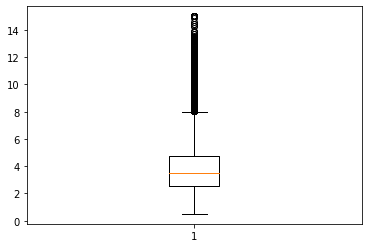

In [ ]:
plt.boxplot(df['median_income'])
plt.show()


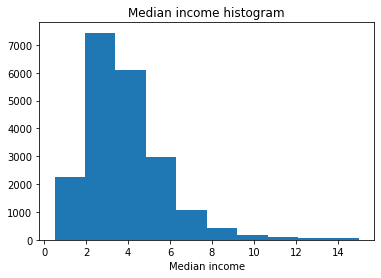

'\nFrom histogram we can see the distribution left scewed\nmost of data lies between 0.5 to 8\n'

In [ ]:
plt= reload(plt)
plt.hist(df['median_income'])
plt.title('Median income histogram')
plt.xlabel('Median income')
plt.show()
'''
From histogram we can see the distribution left scewed
most of data lies between 0.5 to 8
'''

In [ ]:
df[df['median_income']>8].shape
# If we consider above 8 is outlier zone then there will be total 690 records.

(690, 10)

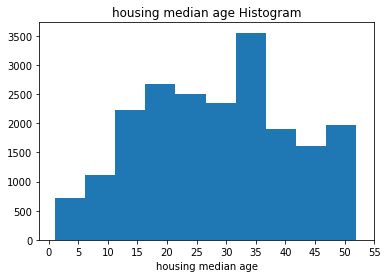

'\nmost of houses are 30 to 35 years old\nThere are lowest number of houses below 5 years old.\n'

In [ ]:
# 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.
# housing_median_age
plt.hist(df['housing_median_age'], bins=10)
plt.title('housing median age Histogram')
plt.xlabel('housing median age')
plt.xticks(range(0,60,5))
plt.show()
'''
most of houses are 30 to 35 years old
There are lowest number of houses below 5 years old.
'''

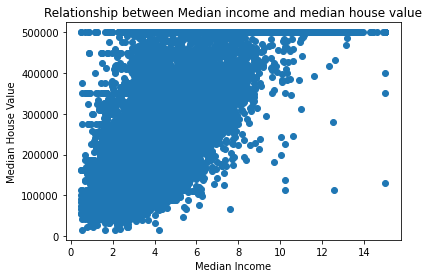

In [ ]:
# 3.Show with the help of visualization, how median_income and median_house_values are related?
plt.scatter(df['median_income'],df['median_house_value'])
plt.title('Relationship between Median income and median house value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [ ]:
# 4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.
df.isnull().sum() # values are not available column wise

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
after_deleted_na_beds = df.dropna(subset=['total_bedrooms']) # delete rows for which 'total_bedrooms' value is not present.
after_deleted_na_beds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.
df['total_bedrooms'].fillna(value=df['total_bedrooms'].mean(), inplace=True) # missing values in 'total_bedrooms' column are updated by mean value
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# 6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.
def cal_median(data):
  df = pd.DataFrame(data)
  return df.median()
res = cal_median([19,3,4,13,17])
print(res)
res = cal_median((19,3,4,123,17))
print(res[0])

0    13.0
dtype: float64
17.0


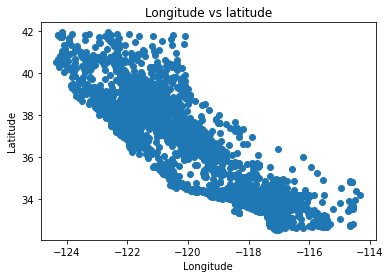

In [ ]:
# 7. Plot latitude versus longitude and explain your observations.


plt.scatter(df['longitude'],df['latitude'])
plt.title('Longitude vs latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


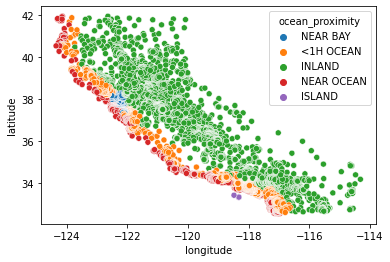

In [ ]:
sns.scatterplot(df['longitude'],df['latitude'],df['ocean_proximity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


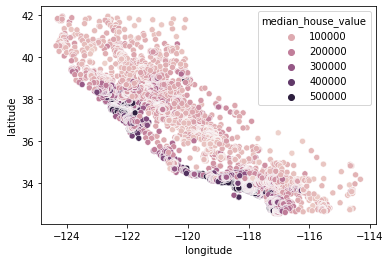

In [ ]:
sns.scatterplot(df['longitude'],df['latitude'],df['median_house_value'])
plt.show()

In [ ]:
# 8. Create a data set for which the ocean_proximity is ‘Near ocean’.
near_ocean = df.loc[df['ocean_proximity']=='NEAR OCEAN']
near_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,NEAR OCEAN
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN
20423,-119.00,34.08,17.0,1822.0,438.0,578.0,291.0,5.4346,428600.0,NEAR OCEAN
20424,-118.75,34.18,4.0,16704.0,2704.0,6187.0,2207.0,6.6122,357600.0,NEAR OCEAN


In [ ]:
# 9. Find the mean and median of the median income for the data set created in question 8.
print(near_ocean['median_income'].mean())

4.0057848006019565


In [ ]:
# 10. Please create a new column named total_bedroom_size.
#If the total bedrooms is 10 or less, it should be quoted as small. 
#If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

df.loc[df['total_bedrooms'] <= 10, 'total_bedroom_size']='small'
df.loc[(df['total_bedrooms'] >= 11) & (df['total_bedrooms']<1000), 'total_bedroom_size']='medium'
df.loc[df['total_bedrooms'] > 1000, 'total_bedroom_size']='large'
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,medium
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,large
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,medium
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,medium
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,medium
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,medium
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,medium
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,medium
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,medium


In [ ]:
''' 
1. The median age of a houses is between 1 and 52. 
From the histogram we see there are a lot of houses aged 52.
The number of houses aged 52 are unusally higher than the other counts.
This is because the age value was capped. Any house that was older than 52 years was considered 52 years.

2. Similarly median house value is also capped at 500,001 dollars.

3. The max and min value for median income is 1 and 15. 

4. we notice that attributes like total_rooms, total_bedrooms, households tend to be tail heavy:
 they extend much farther to the right.This may mean that that the attributes have a lot of outliers
'''
